In [10]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


import numpy as np
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler
import seaborn as sns
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import silhouette_score

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn.cluster

import os
from yellowbrick.cluster import SilhouetteVisualizer

#from sklearn_som.som import SOM

ModuleNotFoundError: No module named 'sklearn_som'

In [2]:
bank_PCA = pd.read_csv("/Users/maria/Desktop/TS-Clustering/extracted_features/bank_reserves_PCA.csv")

/Users/maria/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/maria/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/maria/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/maria/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/maria/anacond

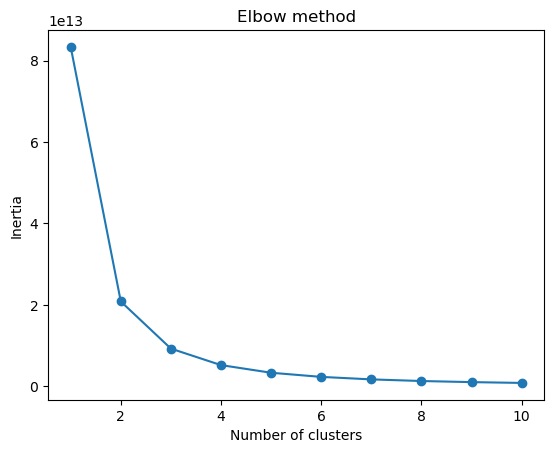

In [8]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(bank_PCA)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [9]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(bank_PCA)

/Users/maria/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [12]:
seed = 0
np.random.seed(seed)
bank_poor_ts = pd.read_csv('/Users/maria/Desktop/TS-Clustering/SimData/bank_reserves_outputs_poor.csv')
X_train_poor = to_time_series_dataset(bank_poor_ts)
sz = X_train_poor.shape[1]

4320.164 --> 2728.556 --> 2669.133 --> 2645.393 --> 2630.519 --> 2618.327 --> 2608.954 --> 2601.479 --> 2595.212 --> 2589.745 --> 2584.843 --> 2580.593 --> 2577.012 --> 2573.988 --> 2571.188 --> 2568.694 --> 2566.478 --> 2564.396 --> 2562.562 --> 2560.895 --> 2559.064 --> 2557.341 --> 2555.679 --> 2554.167 --> 2552.867 --> 2551.721 --> 2550.625 --> 2549.675 --> 2548.751 --> 2547.844 --> 2547.053 --> 2546.322 --> 2545.608 --> 2544.879 --> 2544.120 --> 2543.367 --> 2542.601 --> 2542.016 --> 2541.559 --> 2541.197 --> 2540.841 --> 2540.490 --> 2540.148 --> 2539.789 --> 2539.419 --> 2539.000 --> 2538.543 --> 2538.118 --> 2537.692 --> 2537.269 --> 


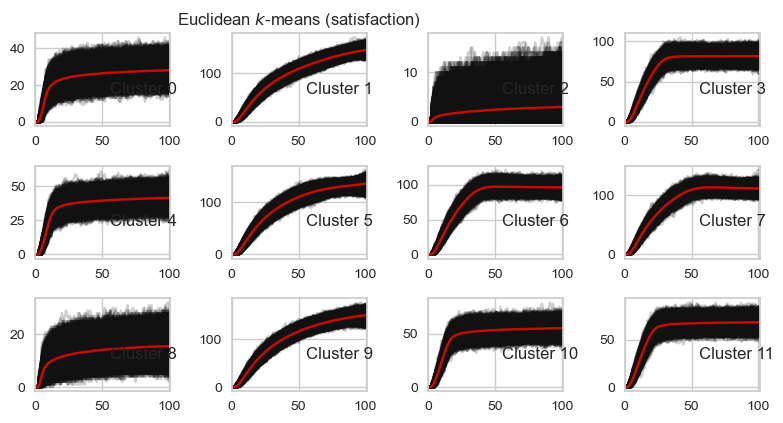

In [17]:
km = TimeSeriesKMeans(n_clusters=12, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train_poor)
plt.figure()
for yi in range(12):
    plt.subplot(4, 4, yi + 1)
    for xx in X_train_poor[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    #plt.ylim(0, 100)
    plt.text(0.55, 0.35,'Cluster %d' % (yi),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means (satisfaction)")
        
plt.tight_layout()
#plt.savefig('schelling_satisfaction_ts.svg')
plt.show()